#1) Introdução

Este é um projeto de Ciência de Dados que tem o intuito de elaborar modelos de regressão linear para prever preços de casas em Melbourne, Austrália.
<br><br>
Trata-se de um projeto para estudo e composição de portfólio.
<br><br>
Inicialmente, foi realizada uma análise exploratória dos dados, com o intuito de descrever algumas relações e demonstrar alguns insights que podem ser estratégicos na tomada de decisões.
<br><br>
A seguir, os dados foram pré-processados, ocorrendo a análise de valores missing e análise de outliers. Também foi realizada a conversão de variáveis categóricas em numéricas. Não foram imputados valores aos dados faltantes para que se evite o problema de data leakage (por exemplo, os valores faltantes não foram substituídos pela média de valores, que é calculada com todo conjunto de treino e teste)
<br><br>
Feito isso, os dados foram separados em dados de treino e de teste, antes de qualquer manipulação através dos algortitmos de Machine Learning. Os dados de teste  obtidos representam 20% dos dados totais, e são utilizados somente na verificação do desempenho do modelo final já treinado.
<br><br>
Na sequência, foram criados três modelos baseline, treinados com os dados de treino (80% dos dados totais): Regressão Linear, Árvore de Decisão e Floresta Aleatória. Nenhum hiperparâmetro foi modificado, adotando-se assim os valores default. A partir da análise das métricas de cada modelo foi selecionado o algoritmo de Floresta Aleatória como sendo o mais promissor para a sequência do projeto.
<br><br>
No modelo selecionado (Floresta Aleatória) foi realizada a validação cruzada com o objetivo de se obter métricas um pouco mais realistas, utilizando-se os  dados de treino (80% dos dados totais), divididos em 5 folds. Os valores dos resultados de desempenho são exibidos através de um quadro resumo.
<br><br>
Como tentativa de melhoria dos resultados, foi realizada a normalização e padronização dos dados, aos quais não apresentaram muita eficácia em relação ao modelo treinado.
<br><br>
Por fim, a partir do modelo de Floresta Aleatória já treinado (baseline) foram feitas novas predições com dados nunca antes vistos (X_teste, que representa 20% dos dados do dataset original)
<br><br>
Observa-se que o modelo de Floresta Aleatória, por se tratar de um modelo ensemble e mais complexo, obteve melhores resultados, visto que as correlações entre as variáveis são complexas e em sua grande maioria a distribuição é complexa e não linear.

###Dicionário dos dados:

Rooms: Representa o número de quartos no imóvel.

Price: Refere-se ao preço de venda do imóvel em dólares australianos.

Method: Indica o método de venda do imóvel (por exemplo, S - venda, SP - venda prévia, PI - venda particular, etc.).

Type: Representa o tipo de propriedade (por exemplo, h - casa, u - unidade/apartamento, t - casa geminada ou semi-separada).

SellerG: Refere-se ao nome do agente imobiliário responsável pela venda do imóvel.

Date: Indica a data da venda do imóvel.

Distance: Representa a distância em quilômetros do imóvel ao centro da cidade de Melbourne.

Postcode: Refere-se ao código postal da área em que o imóvel está localizado.

Bedroom2: Indica o número de quartos além do quarto principal.

Bathroom: Representa o número de banheiros no imóvel.

Car: Representa o número de vagas de estacionamento disponíveis para veículos no imóvel.

Landsize: Refere-se ao tamanho do terreno em metros quadrados.

BuildingArea: Indica a área construída do imóvel em metros quadrados.

YearBuilt: Representa o ano em que o imóvel foi construído.

CouncilArea: Refere-se à área do conselho local em que o imóvel está localizado.

Lattitude: Indica a latitude geográfica do imóvel.

Longtitude: Representa a longitude geográfica do imóvel.

Regionname: Refere-se ao nome da região geográfica em que o imóvel está localizado.

Propertycount: Indica a contagem de propriedades na área suburbana em que o imóvel está localizado.

#2) Análise exploratória

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Impotando o dataset:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos pessoais/01. Projetos Machine Learning/Melbourn Housing/melb_data.csv',parse_dates=['Date'])

<ipython-input-398-279f08ed9cf2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos pessoais/01. Projetos Machine Learning/Melbourn Housing/melb_data.csv',parse_dates=['Date'])


In [ ]:
# Criando cópia do dataset
df=data.copy()

In [ ]:
# Visualizando linhas aleatórias do dataset
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12906,Bentleigh,210 Centre Rd,4,h,1895000.0,S,Jellis,2017-08-19,11.4,3204.0,...,2.0,2.0,557.0,220.0,1920.0,NaN,-37.91741,145.02873,Southern Metropolitan,6795.0
1267,Brunswick,141 Gold St,2,h,845500.0,S,Nelson,2016-07-05,5.2,3056.0,...,1.0,1.0,179.0,90.0,1890.0,Moreland,-37.77420,144.95420,Northern Metropolitan,11918.0
1931,Coburg,6 Shackell St,2,h,735000.0,SP,Nelson,2016-06-08,7.8,3058.0,...,1.0,1.0,280.0,93.0,1900.0,Moreland,-37.74290,144.95200,Northern Metropolitan,11204.0
8806,Fairfield,60 Station St,3,h,1550000.0,S,Jellis,2017-01-07,5.7,3078.0,...,2.0,0.0,478.0,NaN,NaN,Darebin,-37.78022,145.01771,Northern Metropolitan,2970.0
9163,Glen Iris,9 Summerhill Rd,3,h,1890000.0,S,J,2017-03-06,7.3,3146.0,...,1.0,2.0,554.0,169.0,1925.0,Boroondara,-37.84949,145.07726,Southern Metropolitan,10412.0
10339,Heidelberg West,581 Waterdale Rd,2,h,532000.0,S,Ray,2017-05-27,8.8,3081.0,...,2.0,1.0,220.0,NaN,NaN,Banyule,-37.73549,145.04870,Eastern Metropolitan,2674.0
994,Box Hill,7/12 Oxford St,1,u,340000.0,SP,Lindellas,2017-03-18,13.1,3128.0,...,1.0,1.0,29.0,NaN,NaN,Whitehorse,-37.82150,145.12140,Eastern Metropolitan,4605.0
2485,Essendon North,21 Greville St,4,h,1605000.0,S,Barry,2016-08-22,9.4,3041.0,...,2.0,2.0,607.0,NaN,1940.0,Moonee Valley,-37.73710,144.89730,Western Metropolitan,1308.0
10929,Brighton East,3/87 Thomas St,2,u,890000.0,S,Hodges,2017-12-08,10.3,3187.0,...,1.0,2.0,275.0,106.0,1970.0,Bayside,-37.91106,145.02394,Southern Metropolitan,6938.0
3114,Hawthorn,49 Berkeley St,3,h,5100000.0,S,Jellis,2016-03-12,4.6,3122.0,...,2.0,3.0,1038.0,NaN,NaN,Boroondara,-37.83320,145.03660,Southern Metropolitan,11308.0


In [ ]:
# Visualizando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [ ]:
# Visualizando valores únicos
df.nunique().sort_values(ascending=False)

Address          13378
Longtitude        7063
Lattitude         6503
Price             2204
Landsize          1448
BuildingArea       602
Suburb             314
Propertycount      311
SellerG            268
Distance           202
Postcode           198
YearBuilt          144
Date                58
CouncilArea         33
Bedroom2            12
Car                 11
Bathroom             9
Rooms                9
Regionname           8
Method               5
Type                 3
dtype: int64

In [ ]:
# Valores faltantes
df.isnull().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [ ]:
# Sumarização
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


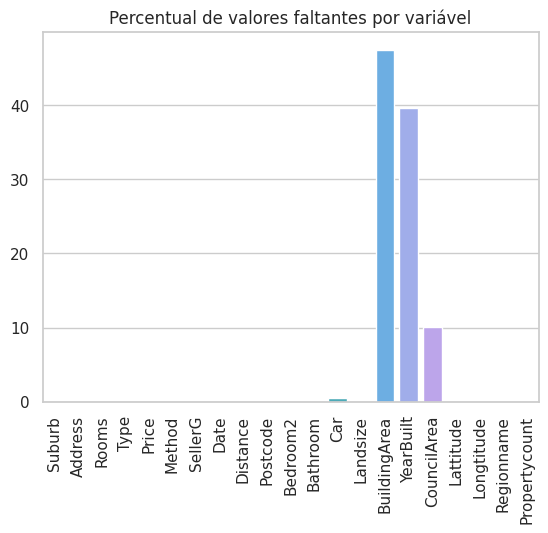

In [ ]:
# Exibido gráfico de valores faltantes
ax=sns.barplot(x=df.columns,y=100*df.isnull().sum()/len(list(df.index)))
plt.xticks(rotation=90)
_=ax.set_title('Percentual de valores faltantes por variável')

Percebe-se que as variáveis 'BuildingArea', 'YearBuilt' e 'CouncilArea' possuem alto percentual de valores faltantes.

Logo, nas etapas futuras, as mesmas não serão utilizadas nas predições.
<br><br>
A variável 'Car' possui alguns poucos valores faltantes (62 de 13580). Como o percentual é baixo, serão inputados valores iguais a Zero nestas instâncias Entende-se que, posivelmente, a falta de informações é originada da não existência de vagas de carro nestas instâncias.
<br><br>

É possível perceber que existem valores iguais a Zero em algumas variáveis:

* Badroom2: como a variável indica o número de quartos além do quarto principal, acredita-se não se tratar de erro na obtenção dos valores. 

* Bathroom: Acredita-se que há erros na obtenção destes valores. Não é comum encontrar imóveis sem banheiros.

* Landsize: Acredita-se que há erros na obtenção dos valores. É improvável uma área de terreno igual a zero. Supostamente, esses valores são de instâncias do tipo apartamento, onde não faz muito sentido informar a área do terreno do edifício (seria mais interessante, em casos de apartamento, informar a área do mesmo). Sendo assim, será feita a investigação de onde ocorrem os valores de LandingSize iguais a zero.

* BuildingArea: Da mesma forma que para LandinSize, não faz entido ter área de imóvel igual a Zero. Possivelmente os valores das áreas dos imóveis não eram conhecidos no mommento da coleta dos dados, e foram informados os valores Zero apenas para preenchimento dos campos

* Car: para esta variável, faz sentido haver imóveis sem nenhuma vaga de garagem, principalmente para apartamentos.

* YearBuilt: Existe um valor mínimo que chama a atenção que é o ano de 1196. Porém, com inúmeros valores faltantes, essa variável não será utilizada, logo, não se faz necessária nenhuma análise adicional.
<br><br>

In [ ]:
# Verificando o percentual de valores Zero nas variáveis, 'Bathroom', 'BuildingArea' e 'Landsize'
qtd1=df.loc[df['Bathroom']==0,'Bathroom'].count()
qtd2=df.loc[df['BuildingArea']==0,'BuildingArea'].count()
qtd3=df.loc[df['Landsize']==0,'Landsize'].count()

qtd_tot1=len(list(df['Bathroom'].dropna()))
qtd_tot2=len(list(df['BuildingArea'].dropna()))
qtd_tot3=len(list(df['Landsize'].dropna()))

print(f'\n{100*(qtd1/qtd_tot1):.2f}% dos valores de "Bathroom" são iguais a Zero')
print(f'\n{100*(qtd2/qtd_tot2):.2f}% dos valores de "BuildingArea" são iguais a Zero')
print(f'\n{100*(qtd3/qtd_tot3):.2f}% dos valores de "Landsize" são iguais a Zero')


0.25% dos valores de "Bathroom" são iguais a Zero

0.24% dos valores de "BuildingArea" são iguais a Zero

14.28% dos valores de "Landsize" são iguais a Zero


Observa-se que para as variáveis 'Bathroom' e 'BuildingArea' o percentual de valores Zero's é baixíssimo. Logo, essas instâncias podem ser removidas sem perda de informações relevantes. Porém, como BuildingArea possui muitos valores faltantes, não se faz necessário nenhum processamento nesta variável, pois deidiu-se que a mesma não será utilizada nas predições.
<br><br>
Para a variável 'Landsize' uma análise adicional será realizada, pois há indícios de que os valores zerados se tratam de instâncias do tipo apartamento (unity). Ou seja, o usuário se abstém de responder a essa informação, por desconhecimento ou por não fazer sentido em se inserir a área de um lote quando
se trata de uma unidade do tipo de apartamento.
<br><br>

In [ ]:
# Verificando em qual tipo de imóvel há mais valores faltantes para a variável 'Landsize'
df.loc[df['Landsize']==0,['Type','Landsize']].groupby('Type').size().sort_values(ascending=False)

Type
u    1629
h     171
t     139
dtype: int64

Observa-se que a maioria dos valores zerados para a variável 'LandingSize' é referente a apartamentos (type = u - unity), confirmado a hipótese inicial.

Como não há nenhuma outra informação ao qual se possa fazer uma relação com área da unidade, esta variável será excluída.
<br><br>

In [ ]:
# Correlação com a variável preço
df.corr()['Price'].sort_values(ascending=False)

<ipython-input-408-693a5d6e192a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

Na listagem acima, não há nenhuma variável altamente correlacionada com a variável preço.

As variáveis 'Rooms', 'Bedroom2' e 'Bethroom' são as mais promissoras em termos de correlação positiva. Em segundo plano, estão as variáveis 'Car' e 'Longtitude'.

Coriosamente, variar a posição geográfica de um imóvel ao longo de um eixo horizontal ao longo da cidade de Melbourne influencia mais o preço do que a variação ao longo de um eixo vertical. Este ponto ainda será abordado.

Já a variável 'YearBuilt' é a mais promissora em termos de correlação negativa, porém, por possuir diversos valores faltantes, não será utilizada.
<br><br>

In [ ]:
# Verificando se há valores duplicados
df.duplicated().value_counts()

False    13580
dtype: int64

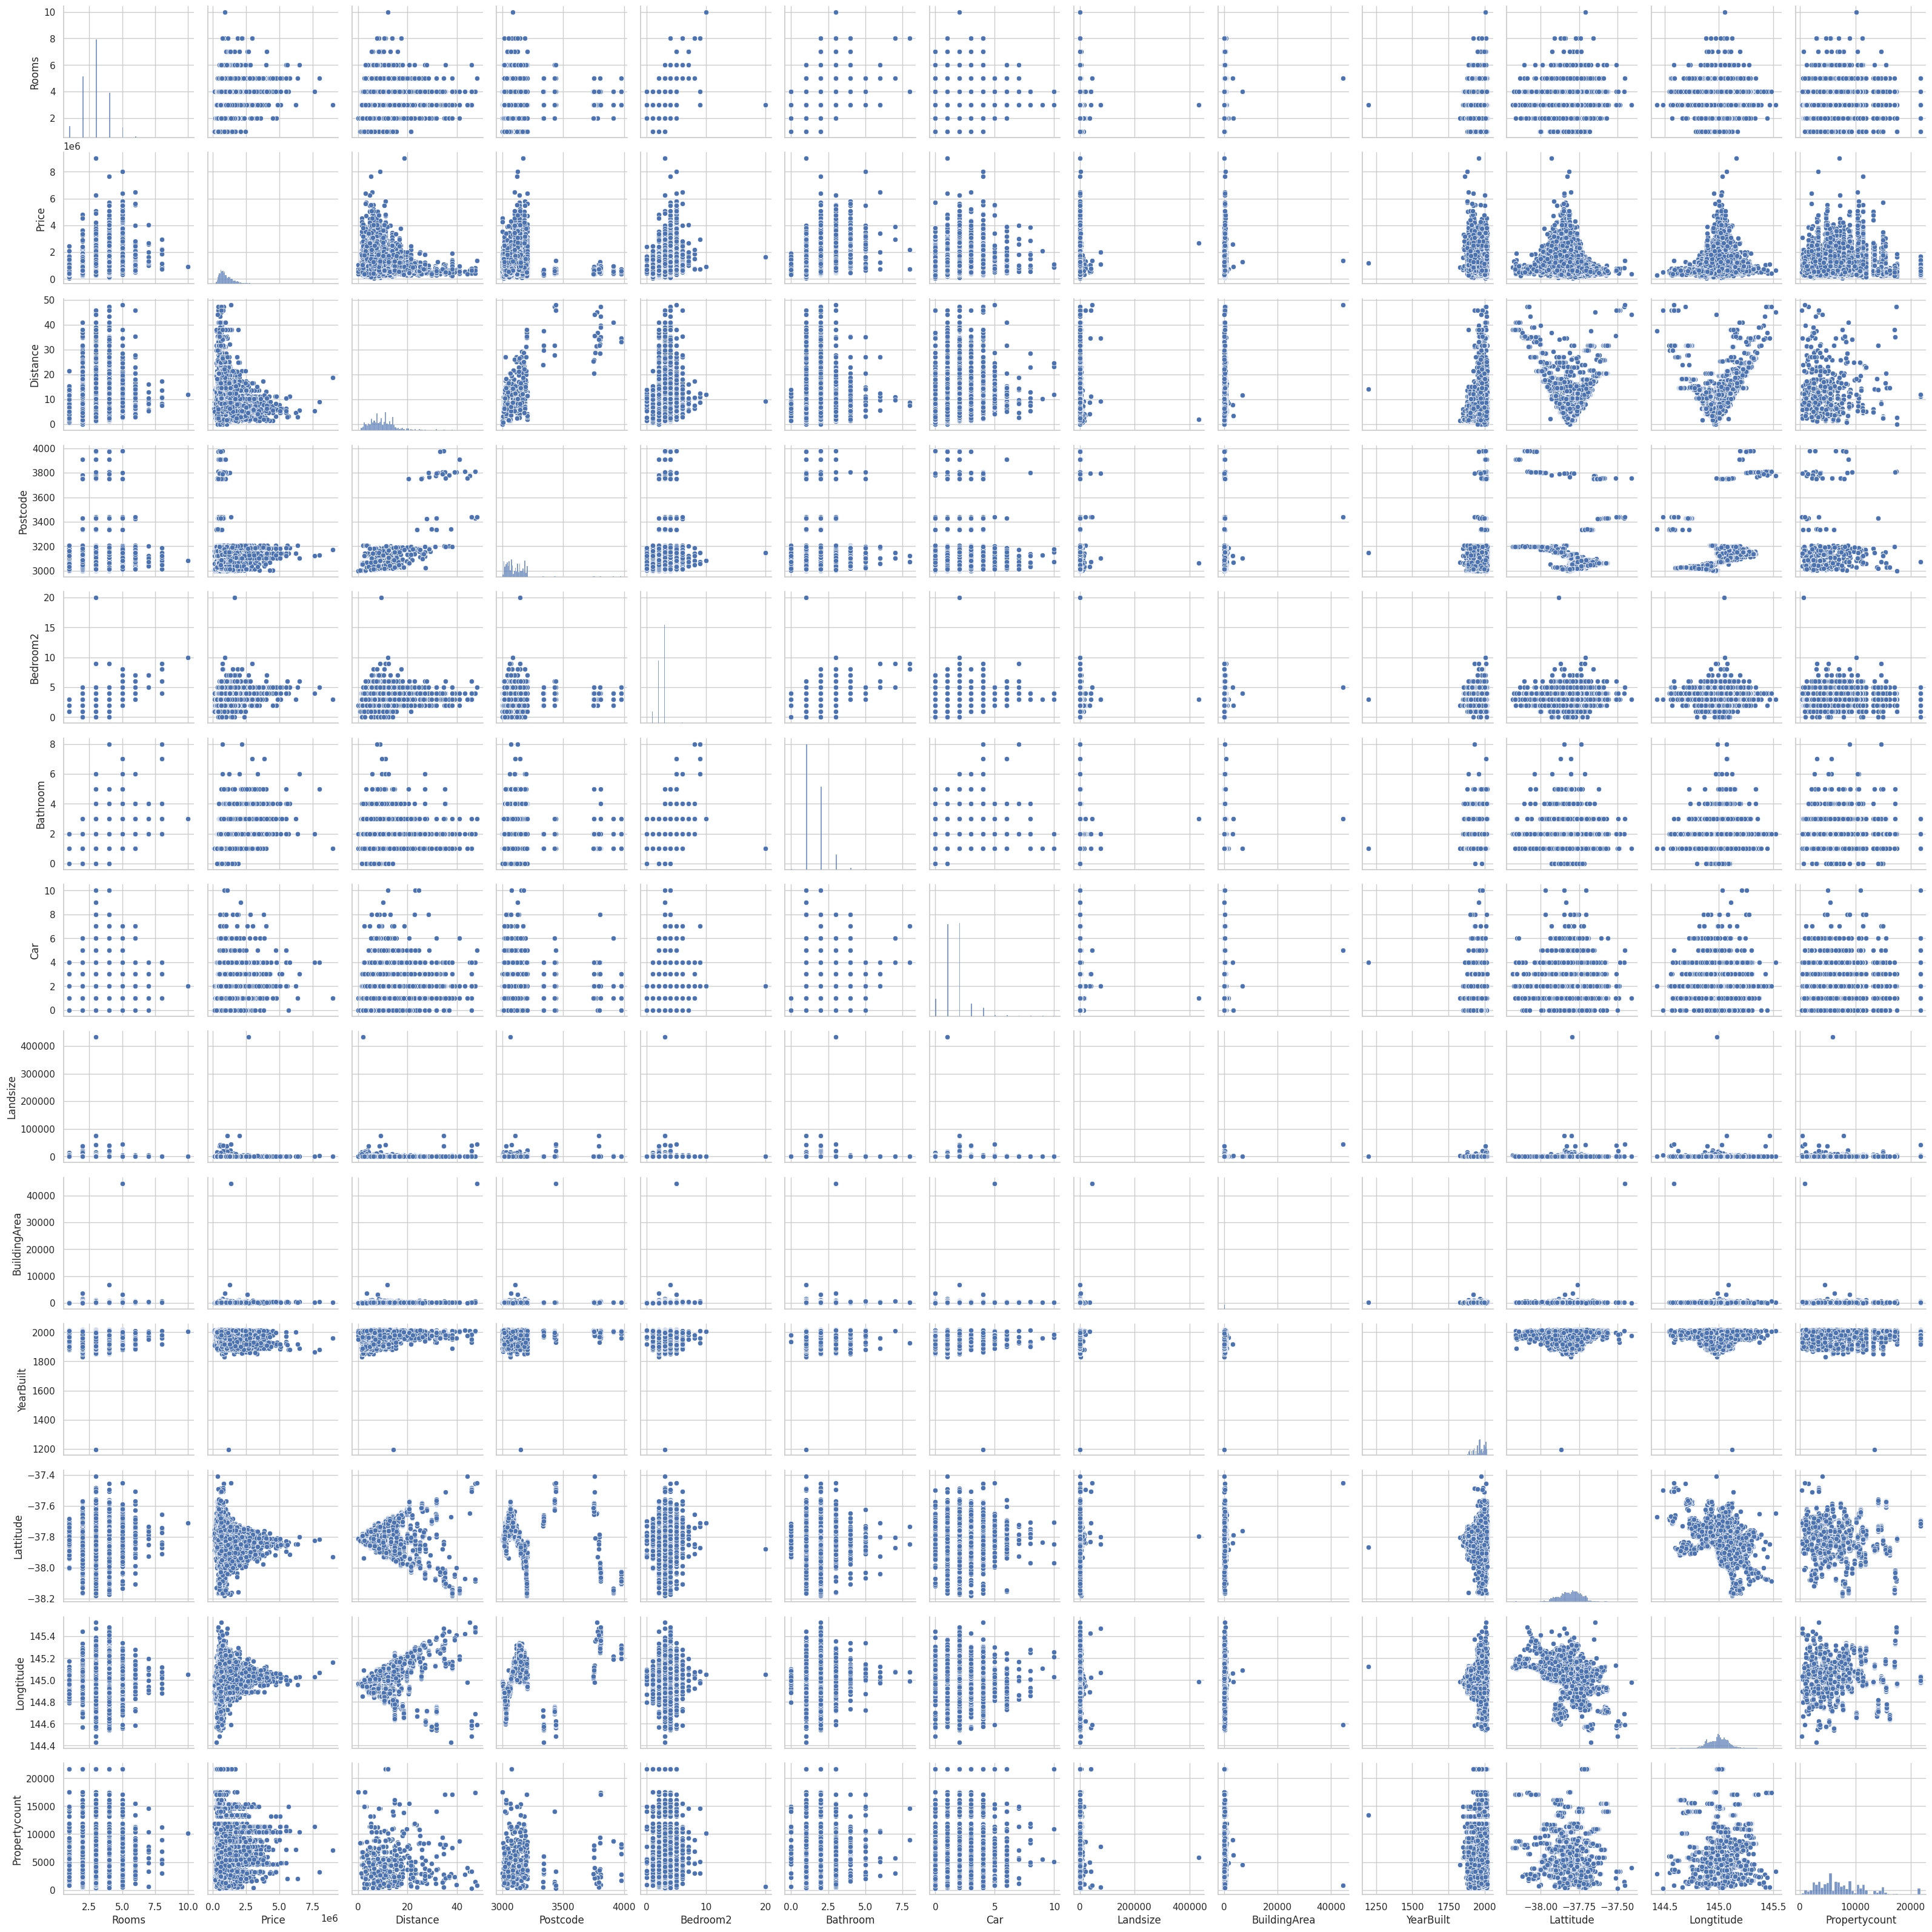

In [ ]:
# Análise da relação entre as variáveis
sns.pairplot(df)

A relação das variáveis coma target ('Price'), em sua grande maioria, são complexas.

Somente a variável 'Distance' que apresenta uma relação mais próxima da linear com a variável 'Price'.
<br><br>

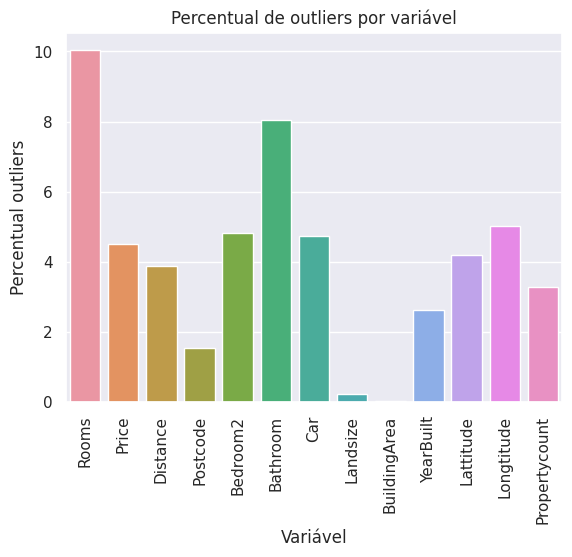

In [ ]:
# Verificando a quantidade de outliers por variável numérica:

sns.set_style('darkgrid')

#Total de instâncias
tot_inst=df.shape[0]

#Definindo listas vazias para contabilizar os outliers
qtd_out_inf=[]
qtd_out_sup=[]

#Lista vazia para armazenar o nome da variável
nome_col=[]

for col in df.columns:

  if df[col].dtypes == 'float64' or df[col].dtypes == 'int':  #fitrando somente colunas numéricas
    # Limite superior = mediana + 2x Desvio Padrão
    ls=np.mean(df[col])+2*np.std(df[col])

    # Limite inferior = mediana - 2x Desvio Padrão
    li=np.mean(df[col])-2*np.std(df[col])

    # contando os valores fora dos limites (outliers)
    qtd_out_sup.append(df.loc[df[col]>ls,col].count())
    qtd_out_inf.append(df.loc[df[col]<li,col].count())

    # Armazenando o nome da variável
    nome_col.append(col)

# Definindo um dataset resumo:
qd_out=pd.DataFrame()
qd_out['Variável']=nome_col
qd_out['Outliers inf']=qtd_out_inf
qd_out['Outliers sup']=qtd_out_sup
qd_out['Outliers totais']=qd_out['Outliers inf']+qd_out['Outliers sup']
qd_out['Percentual outliers']=100*qd_out['Outliers totais']/tot_inst

# Exibindo o dataframe
# qd_out.sort_values(by=['Outliers totais'],ascending=False)

# Exibido gráfico
ax=sns.barplot(x=qd_out['Variável'],y=qd_out['Percentual outliers'])
plt.xticks(rotation=90)
_=ax.set_title('Percentual de outliers por variável')

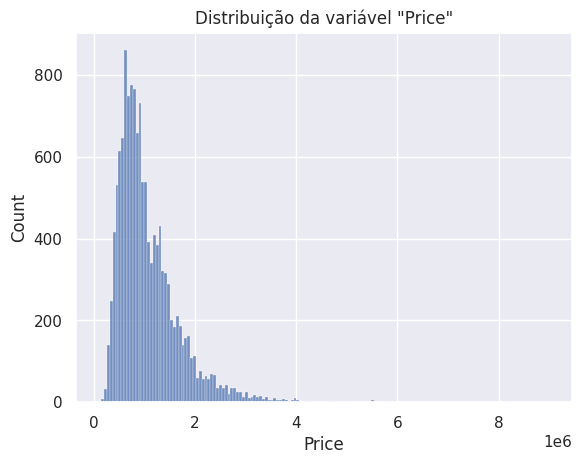

In [ ]:
# Distribuição da variável preço
ax=sns.histplot(df['Price'])
_=ax.set_title('Distribuição da variável "Price"')


Existem 611 valores acima do limite superior, o que correponde a 4.50 % dos dados da variável
Existem 0 valores abaixo do limite inferior, o que correponde a 0.00 % dos dados da variável
No total, existem 611 outliers, que representam 4.50 % dos dados da variável




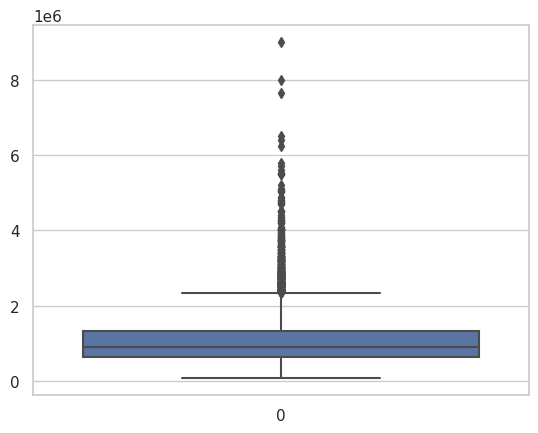

In [ ]:
# Outliers da variável target (Price)
# Econtrando os limites superior e inferior
col='Price'
tot=df[col].count()

# Limite superior = mediana + 2x Desvio Padrão
ls=np.mean(df[col])+2*np.std(df[col])

# Limite inferior = mediana - 2x Desvio Padrão
li=np.mean(df[col])-2*np.std(df[col])

# Listando os valores fora dos limites (outliers)
out_sup=df.loc[df[col]>ls,col]
out_inf=df.loc[df[col]<li,col]

print(f'\nExistem {out_sup.count()} valores acima do limite superior, o que correponde a {100*out_sup.count()/tot:.2f} % dos dados da variável')
print(f'Existem {out_inf.count()} valores abaixo do limite inferior, o que correponde a {100*out_inf.count()/tot:.2f} % dos dados da variável')
print(f'No total, existem {out_sup.count()+out_inf.count()} outliers, que representam {100*(out_sup.count()+out_inf.count())/tot:.2f} % dos dados da variável\n\n')

# Visualizando os outliers das variáveis
sns.set(style="whitegrid", color_codes=True)
_=sns.boxplot(data=df[col])

Somente 4,5% dos valores da variável preço são considerados outliers.

Com base na distribuição dos valores, pode-se assumir que os valores não foram inseridos de forma errada, sendo assim, fazem parte do contexto avaliado.
<br><br>

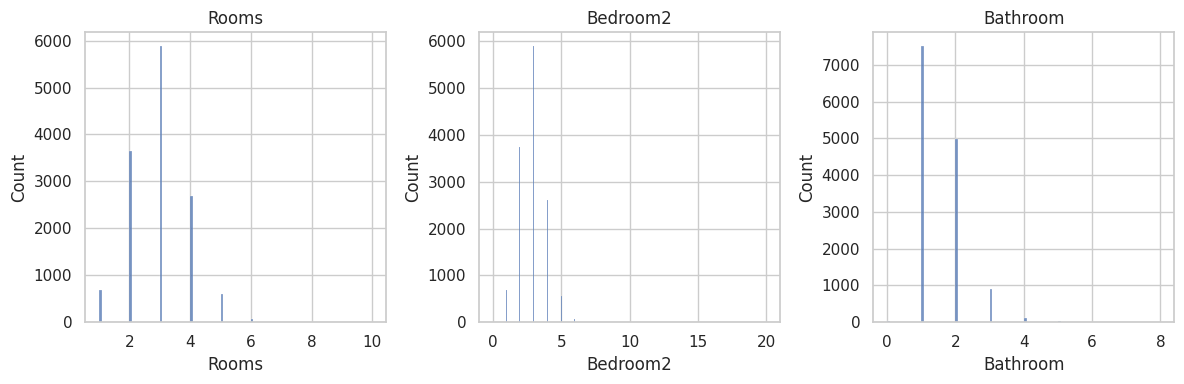

In [ ]:
# Distribuição da variáveis 'Rooms', 'Bedroom2' e 'Bathroom'

# Configurações do gráfico - (1,3) é o número de linhas e coluas do plot
fig, axes = plt.subplots(1, 3, figsize=(12,4))

# Histograma da variável 1
sns.histplot(df['Rooms'], ax=axes[0])
axes[0].set_title('Rooms')
axes[0].autoscale()

# Histograma da variável 2
sns.histplot(df['Bedroom2'], ax=axes[1])
axes[1].set_title('Bedroom2')
axes[1].autoscale()

# Histograma da variável 3
sns.histplot(df['Bathroom'], ax=axes[2])
axes[2].set_title('Bathroom')
axes[2].autoscale()

# Ajustes de layout
plt.tight_layout()

# Exibição do gráfico
plt.show()

Como as três variáveis são as mais correlacionadas com a target ('Price'), se fez necessário um melhoe entendimento de suas dstribuições.


Verificando os histogramas, percebe-se a existência de alguns valores incoerentes na distribuição da variável Bedroom2
<br><br>

,Ocorrências
Bedroom2,
20.0,1
10.0,1
9.0,3
8.0,5
7.0,10
6.0,63
5.0,556
4.0,2601
3.0,5896


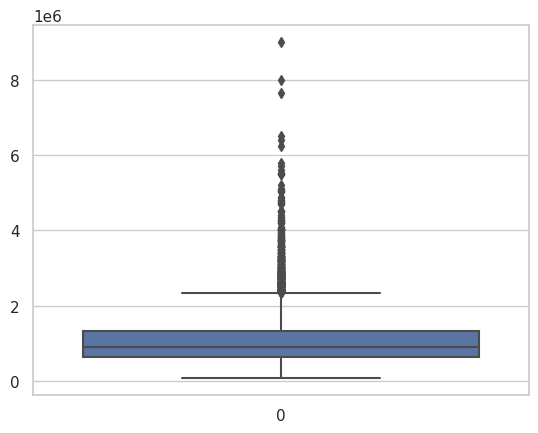

In [ ]:
# Visualizando os outliers da variável 'Bedroom2'
sns.set(style="whitegrid", color_codes=True)
_=sns.boxplot(data=df[col])

df_bed=pd.DataFrame()

# Valores extremos da variável 'Bedroom2'
df_bed['Ocorrências']=df['Bedroom2'].value_counts()
df_bed['Bedroom2']=df['Bedroom2'].value_counts().index
df_bed=df_bed.sort_values('Bedroom2',ascending=False)
df_bed=df_bed.set_index('Bedroom2')
df_bed

In [ ]:
# Procurando a instância ao qual o número de banheiros é 20
df[df['Bedroom2']==20]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7404,Caulfield East,5 Grange Rd,3,h,1650000.0,PI,Woodards,2016-06-08,9.3,3145.0,...,1.0,2.0,875.0,NaN,NaN,Glen Eira,-37.8815,145.0491,Southern Metropolitan,608.0


A instância indica a existência de 3 quartos e 1 banheiro, logo, assume-se que houve erro de inserção do valor.

Esta instância será excluída do dataframe.
<br><br>

<Axes: xlabel='Bedroom2', ylabel='Count'>

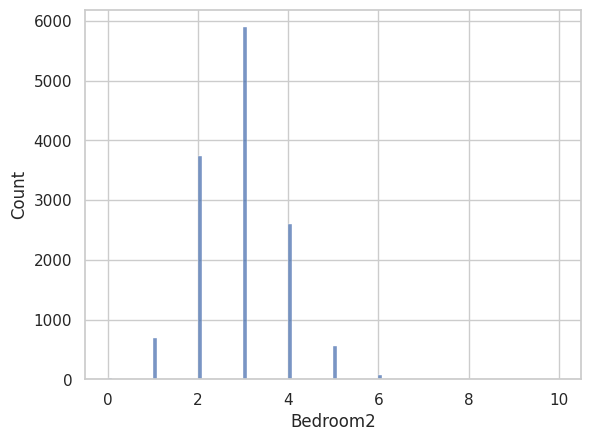

In [ ]:
# Dropando o valor extremo e plotando o histograma
df=df.drop(df[df['Bedroom2']==20].index)

sns.histplot(df['Bedroom2'])

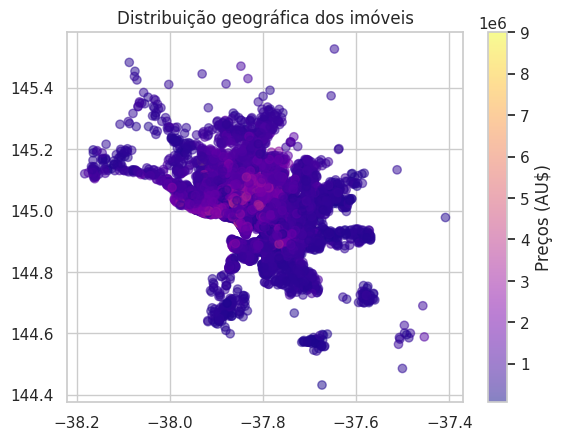

In [ ]:
# Visualizando a distribuição geográfica dos imóveis
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0, vmax=df['Price'].max())
# norm = mcolors.Normalize(vmin=df['Price'].min(), vmax=df['Price'].max())
plt.scatter(x=df['Lattitude'],y=df['Longtitude'],c=df['Price'],cmap='plasma',alpha=0.5)

plt.title('Distribuição geográfica dos imóveis')
# colorbar = plt.colorbar()
colorbar =plt.colorbar()
colorbar.set_label('Preços (AU$)')

Através do gráfico fica nítido que a tendência de concentração de imóveis de maior valor está em torno de uma região central.
<br><br>

In [ ]:
# Verificando quais subúrbios possuem mais valores faltantes para a área construída
# Verificados apenas os valores para imóveis tipo casa, já que a maioria dos imóveis tipo apartamento possuem valores Zero.

#Criando um dataset filtrando apenas imóveis do tipo casa
sub=df.loc[df['Type']=='h',['Suburb','BuildingArea']]

# Datasets auxiliares
sub1=pd.DataFrame()
sub2=pd.DataFrame()

# Quantidade de valores faltantes da variável 'BuildingArea' agrupada por subúrbio
# sub1['suburbio']=sub.groupby('Suburb')['BuildingArea'].apply(lambda x: x.isnull().sum()).index
sub1['faltantes']=sub.groupby('Suburb')['BuildingArea'].apply(lambda x: x.isnull().sum())
sub1['suburbio']=sub1.index

# Quantidade total de valores para cada subúrbio
sub2['totais']=sub.groupby('Suburb').size()
sub2['suburbio']=sub2.index

sub3=pd.merge(sub1,sub2,on='suburbio')
sub3['Percent']=100*sub3['faltantes']/sub3['totais']
sub3=sub3.set_index('suburbio')

#definindo um percentual limite de valores faltantes
lim=0.1

#Dropando os subúrbios com menso de X por cento de valores faltantes para a variável 'BuildingArea'
sub3=sub3.drop(sub3[sub3['Percent']<0.1].index)

#Classificando os valores e exibindo o dataset
sub3.sort_values(by=['Percent','totais'],ascending=[False,False])


,faltantes,totais,Percent
suburbio,,,
Aspendale Gardens,4,4,100.000000
Lower Plenty,3,3,100.000000
Southbank,3,3,100.000000
Keilor Lodge,2,2,100.000000
Ripponlea,2,2,100.000000
...,...,...,...
Taylors Hill,1,7,14.285714
Meadow Heights,2,15,13.333333
Melton West,1,8,12.500000


A lista acima contém todos os subúrbios onde as casas sem informação de área construída é maior do que 10% das casas totais cadastradas.

O intuito desta análise é possibilitar um direcionamento para nova coleta de dados futura, pois esta informação pode ser relevante nas predições.

In [ ]:
# Top 10 Preço médio por m² de terreno, por região
df_top=df.loc[df['Landsize']>0,['Suburb','Price','Landsize']]
#Observação: alguns valores de landsize estão como Zero

df_top['AU$/m²'] = df_top['Price']/df_top['Landsize']
df_top[['Suburb','AU$/m²']].groupby('Suburb').mean().sort_values(by=['AU$/m²'],ascending=False).head(10)

,AU$/m²
Suburb,
Toorak,13962.976006
Albert Park,11265.487673
Heidelberg West,10936.445382
Middle Park,10798.917048
South Melbourne,10030.846086
East Melbourne,9528.402776
Carlton,8612.341479
West Melbourne,8571.265172
Prahran,8375.295851


Esta lista é útil para saber as regiões com maiores preços de imóveis.

Um bom indicador para investimentos.
<br><br>

Text(0, 0.5, 'Contagem')

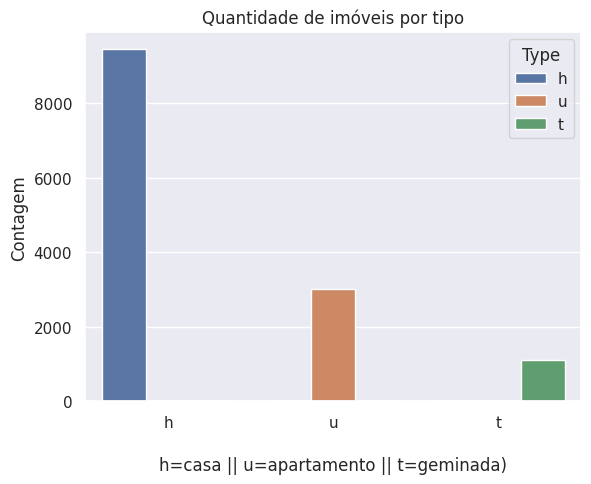

In [ ]:
# Verificando a distribuição do tipo de imóvel

sns.set_style('darkgrid')
df_tipo=df[['Suburb','Type']]
ax=sns.countplot(df_tipo,x=df_tipo['Type'],hue=df_tipo['Type'])
ax.set_title('Quantidade de imóveis por tipo')
ax.set_xlabel('\nh=casa || u=apartamento || t=geminada)')
ax.set_ylabel('Contagem')

<ipython-input-422-8b361c535cc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tipo2['Type']=df_tipo2['Type'].replace(['h','u','t'],['casa','apto','geminada'],regex=True)


Text(0.5, 0, 'Langtitude')

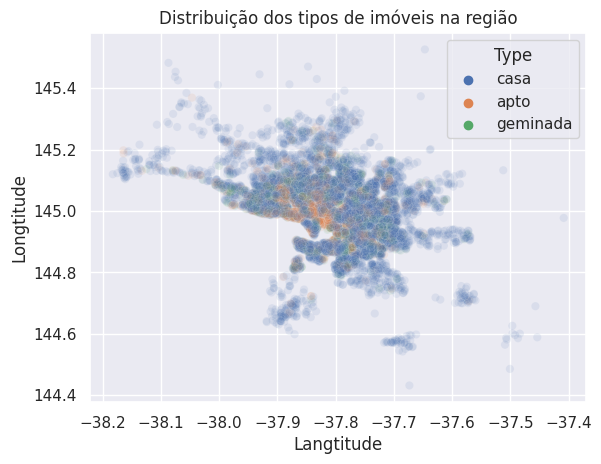

In [ ]:
# Verificando a distribuição dos tipos de imóveis em relação às coordenadas geográficas
df_tipo2=df[['Suburb','Type','Lattitude','Longtitude']]
df_tipo2['Type']=df_tipo2['Type'].replace(['h','u','t'],['casa','apto','geminada'],regex=True)

ax=sns.scatterplot(x=df_tipo2['Lattitude'],y=df_tipo2['Longtitude'],hue=df_tipo2['Type'],alpha=0.1)

ax.set_title('Distribuição dos tipos de imóveis na região')
ax.set_xlabel('Latitude')
ax.set_xlabel('Langtitude')

No gráfico acima, como esperado, fica evidente que a região central comporta o maior número de imóveis do tipo apartamento.
<br><br>

#3) Máquina preditiva

In [ ]:
# Importando as bibliotecas

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import cross_val_score
# Nota: o cross_validate, diferente do cross_val_score, permite avaliar múltiplas pontuações

In [ ]:
# Preparação dos dados

#Criando um dataframe, eliminando variáveis que não serão utilizadas
df_prep=data[['Rooms','Type','Price','Bedroom2','Bathroom','Car','Lattitude','Longtitude','Propertycount','Distance']]
df_prep.info()
# df_prep.describe()

# Variáveis não utilizadas:
# Suburb, RegionName, Address, Postcode, Date, SellerG, Method --> sem relevância
# BuildinArea, YearBuilt, ConcilArea --> muitos valores faltantes
# LandingSize --> muitos valores zerados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  object 
 2   Price          13580 non-null  float64
 3   Bedroom2       13580 non-null  float64
 4   Bathroom       13580 non-null  float64
 5   Car            13518 non-null  float64
 6   Lattitude      13580 non-null  float64
 7   Longtitude     13580 non-null  float64
 8   Propertycount  13580 non-null  float64
 9   Distance       13580 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
# Fazendo a transformação da variável categórica "type"

le=LabelEncoder()

# Treinando o encoder nas variáveis 'type'
df_prep['Type']=le.fit_transform(df_prep['Type'])

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  int64  
 2   Price          13580 non-null  float64
 3   Bedroom2       13580 non-null  float64
 4   Bathroom       13580 non-null  float64
 5   Car            13518 non-null  float64
 6   Lattitude      13580 non-null  float64
 7   Longtitude     13580 non-null  float64
 8   Propertycount  13580 non-null  float64
 9   Distance       13580 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.0 MB


<ipython-input-430-785708828f91>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['Type']=le.fit_transform(df_prep['Type'])


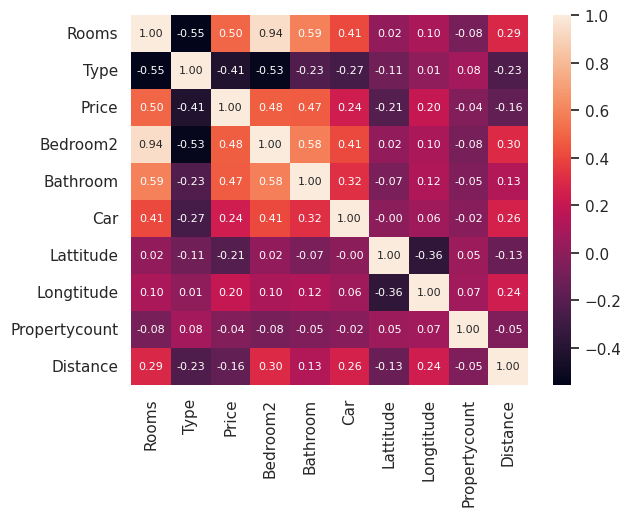

In [ ]:
# Verificando a correlação entre as variáveis
ax=sns.heatmap(df_prep.corr(),annot=True,fmt=".2f",annot_kws={"fontsize": 8})

De acordo com o heatmap acima, existem correlações entre variáveis que chamam a atenção. São elas:
* Rooms <--> Bedroom2 = 0,94

Para evitar problema de multicolinearidade, será excluída a variável Bedrooms2
<br><br>

In [ ]:
# Dropando as variáveis
# df_prep=df_prep.drop(df_prep[['Bedroom2','Bathroom','Type']],axis=1)
df_prep=df_prep.drop('Bedroom2',axis=1)

In [ ]:
# Imputando valores faltantes na variável 'carro'
# Será armazenado o valor igual a 0 (0 vagas de carro)
df_prep['Car'].fillna(0,inplace=True)

In [ ]:
# Dataframe final para o modelo
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  int64  
 2   Price          13580 non-null  float64
 3   Bathroom       13580 non-null  float64
 4   Car            13580 non-null  float64
 5   Lattitude      13580 non-null  float64
 6   Longtitude     13580 non-null  float64
 7   Propertycount  13580 non-null  float64
 8   Distance       13580 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 955.0 KB


In [ ]:
# Criando dados de treino e de teste
X=df_prep.drop('Price',axis=1)
y=df_prep['Price']

X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# Criando, treinando e realizando as predições com os modelos baseline

# Listas auxiliares
metric = {'rmse (AU$)': [], 'r2 (%)': [],'model':[]}


#====================== Regressão linear ==========================

# Regressão linear
lr=LinearRegression()
lr.fit(X_treino,y_treino)
y_pred_lr=lr.predict(X_teste)

#Métricas regressão linear
mse=mean_squared_error(y_teste,y_pred_lr)
rmse=np.sqrt(mse)
r2=r2_score(y_teste,y_pred_lr)*100
metric['rmse (AU$)'].append(rmse)
metric['r2 (%)'].append(r2)
metric['model'].append('lr')

#====================== Árvore de decisão ==========================

#Árvore de decisão
dt=DecisionTreeRegressor()
dt.fit(X_treino,y_treino)
y_pred_dt=dt.predict(X_teste)

#Métricas Árvore de Decisão
mse=mean_squared_error(y_teste,y_pred_dt)
rmse=np.sqrt(mse)
r2=r2_score(y_teste,y_pred_dt)*100
metric['rmse (AU$)'].append(rmse)
metric['r2 (%)'].append(r2)
metric['model'].append('dt')


#====================== Floresta aleatória ==========================

# Floresta aleatória
rf=RandomForestRegressor()
rf.fit(X_treino,y_treino)
y_pred_rf=rf.predict(X_teste)

#Métricas Árvores Aleatória
mse=mean_squared_error(y_teste,y_pred_rf)
rmse=np.sqrt(mse)
r2=r2_score(y_teste,y_pred_rf)*100
metric['rmse (AU$)'].append(rmse)
metric['r2 (%)'].append(r2)
metric['model'].append('rf')

#====================================================================


# Criando dataframe resumo
qd_metric=round(pd.DataFrame(metric),2)
qd_metric.set_index('model')

,rmse (AU$),r2 (%)
model,,
lr,412426.93,57.20
dt,406845.79,58.35
rf,309582.66,75.88


In [ ]:
# Realizando validação cruzada no modelo mais promissor - Random Forest:
# Quantidade de folds: 5

#Definido as métricas
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}

#Rodando o modelo (obs: results será um dicionário!)
results_rf = cross_validate(rf, X_treino, y_treino, cv=5,scoring=scoring)

# Extraindo os resultados médios das métricas do modelo
r2_scores_rf = round(100*results_rf['test_r2'].mean(),2)
rmse_scores_rf = round(results_rf['test_rmse'].mean(),2)


#Criando um dataframe resumo
qd_cross=pd.DataFrame()
qd_cross['model']=['rf']
qd_cross['r2 médio (%)']=[r2_scores_rf]
qd_cross['rmse médio (AU$)']=[rmse_scores_rf]

qd_cross

,model,r2 médio (%),rmse médio (AU$)
0,rf,71.75,340579.13


In [ ]:
# Normalizando os dados de preço do dataset

normal_scaler=MinMaxScaler()

X_treino_norm = normal_scaler.fit_transform(X_treino)


#Definido as métricas
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}

#Rodando o modelo (obs: results será um dicionário!)
results_rf = cross_validate(rf, X_treino_norm, y_treino, cv=5,scoring=scoring)

# Extrair os resultados médios das métricas do modelo
r2_scores_rf = round(100*results_rf['test_r2'].mean(),2)
rmse_scores_rf = round(results_rf['test_rmse'].mean(),2)


#Criando um dataframe resumo
qd_cross=pd.DataFrame()
qd_cross['model']=['rf']
qd_cross['r2 médio (%)']=[r2_scores_rf]
qd_cross['rmse médio (AU$)']=[rmse_scores_rf]

qd_cross

,model,r2 médio (%),rmse médio (AU$)
0,rf,71.54,341934.71


In [ ]:
# Padronizando os dados de preço do dataset

std_scaler=MinMaxScaler()

X_treino_pad = std_scaler.fit_transform(X_treino)

#Definido as métricas
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}

#Rodando o modelo (obs: results será um dicionário!)
results_rf = cross_validate(rf, X_treino_pad, y_treino, cv=5,scoring=scoring)

# Extrair os resultados médios das métricas do modelo
r2_scores_rf = round(100*results_rf['test_r2'].mean(),2)
rmse_scores_rf = round(results_rf['test_rmse'].mean(),2)


#Criando um dataframe resumo
qd_cross=pd.DataFrame()
qd_cross['model']=['rf']
qd_cross['r2 médio (%)']=[r2_scores_rf]
qd_cross['rmse médio (AU$)']=[rmse_scores_rf]

qd_cross

,model,r2 médio (%),rmse médio (AU$)
0,rf,71.58,341632.99


Não houve melhora significativa dos resultados do modelo com a normalização e a padronização.
<br><br>

In [ ]:
# Verificando o modelo em dados nunca vistos

y_inedito=rf.predict(X_teste)

r2_inedito=r2_score(y_inedito,y_teste)*100
rmse_inedito=mean_squared_error(y_inedito,y_teste)
rmse_inedito=np.sqrt(rmse_inedito)

print(f'\nR² final: {r2_inedito:.2f}%\n')
print(f'RMSE final: AU$ {rmse_inedito:.2f}')



R² final: 72.33%

RMSE final: AU$ 309582.66


Aplicando o modelo baseline em dados nunca vistos, o coeficiente de determinação R² apresenta o mesmo valor do teste de validação cruzada, indicando que não ocorreu overfiting.

Assim, este modelo final se mostrou como o mais promissor.
<br><br>

In [ ]:
# Criando predições para dados novos quaisquer:
a=2 #rooms
b=1 #type     # 0=h(casa) || 1=u(unidade/apartamento) || 2=t(casa geminada ou semi-separada).  
c=2 #bathroom
d=1 #car
e=-119.806806 #lattitude
f=85.055900 #longtitude
g=1320  #propertycount
h=12  #distance

new_predict=np.array([a,b,c,d,e,f,g,h])
new_predict = new_predict.reshape(1, -1)  # Transforma o array em uma matriz bidimensional

val=rf.predict(new_predict)
val=float(val)

print('='*50)
print(f'\nO valor estimado do imóvel é de AU$ {val:.2f}\n')
print('='*50)


O valor estimado do imóvel é de AU$ 647863.00



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#4) Avaliação do modelo e considerações finais

Apesar de obter um bom desempenho (71% para o R²), a métrica "raiz do erro médio quadrático (RMSE)" possui valor muito elevado, sendo maior até do que os preços de muitos imóveis. Porém, como a relação entre as variáveis independentes é muito dispersa, ao tentar inferir uma reta de tendência as distâncias para esta reta se tornam excessivas, enviesando os resultados do RMSE, tornando não adequado como métrica de avalição do modelo.
<br><br>
Em relação ao modelo final treinado, é indicado que o mesmo seja testado em outros agrupamentos de dados inéditos antes de ser disponibilizado para a produção.
<br><br>
Sobre a qualidade dos dados utilizados para o projeto, acredita-se que poderiam ser melhores. or exemplo, a variável YearBuilt seria uma boa feature na previsão dos preços, pois poderia indicar o estado de conservação dos imóveis.
A indicação de área total construída do imóvel, ao qual não foi utilizada por existirem muitos valores zerados, também seria uma possível featura promissora.
<br><br>
Por fim, acredita-se que uma maneira de trazer predições mais confiáveis seria separar os modelo em dois: uma para imóveis do tipo casa, outro para imóveis do tipo apartamento, pois existem diferenças substanciais que são captadas em um, mas não em outro. Por exemplo, seria interessante que para os apartamentos fossem coletadas as informações como: área do apartamento e existência ou não de elevador. Enquanto que para as casas poderiam ser coletadas informações como: área construída e área do terreno.
<br><br>